## 0a) Installation und aufsetzen der Umgebung

In [1]:
!sudo apt-get update
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1

!apt-get update > /dev/null 2>&1
!apt-get install cmake > /dev/null 2>&1
!pip install --upgrade setuptools 2>&1
!pip install ez_setup > /dev/null 2>&1
!pip install gym[atari] > /dev/null 2>&1

!pip install atari-py
!pip install gym
!pip install numpy
!pip install opencv-python
!pip install tensorboard
!pip install torch
!pip install torchvision
!pip install pytorch-ignite
!pip install tensorboardX
!pip install tensorflow

!pip install gym-chess # https://snyk.io/advisor/python/gym-chess
!pip install cairosvg
!mkdir ./videos

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:2 http://security.ubuntu.com/ubuntu bionic-security InRelease
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:13 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:15 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic 

## 0b) Helper methods

In [5]:
import gym
from gym.wrappers import Monitor
import glob
import io
import base64
from IPython.display import HTML
from IPython import display as ipythondisplay

import gym_chess
import random
import chess
import chess.svg

from datetime import datetime
from io import BytesIO
from PIL import Image
from cairosvg import svg2png
import cv2
import numpy as np
import matplotlib.pyplot as plt


def write_video(svgs):
  out = cv2.VideoWriter(f'videos/game_{datetime.now()}.mp4', cv2.VideoWriter_fourcc(*'MP4V'), 3, (350, 350))

  for svg in svgs:
    png = convert_svg_to_png(svg)
    out.write(png)

  out.release()


def convert_svg_to_png(svg):  
  png = svg2png(svg)
  pil_img = Image.open(BytesIO(png)).convert('RGBA')
  png = cv2.cvtColor(np.array(pil_img), cv2.IMREAD_COLOR)  

  return png

## Schach

In [6]:
env = gym.make('Chess-v0')
observation = env.reset()

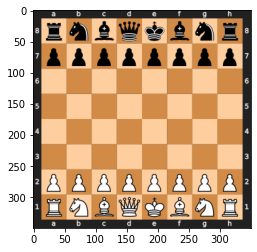

In [7]:
png = convert_svg_to_png(chess.svg.board(observation, size=350))

# displaying image
plt.imshow(png)
plt.show()

In [8]:
env = gym.make('Chess-v0')
observation = env.reset()

# variables
total_reward = 0.0
total_steps = 0
moves = []
svgs = []

while True:
  action = random.sample(env.legal_moves, 1)
         
  observation, reward, done, info = env.step(action[0]) 
  moves.append(action)
  total_reward += reward
  total_steps += 1

  svgs.append(chess.svg.board(observation, size=350))
    
  if done: 
    break;
            
env.close()
write_video(svgs)

print(f"Episode done in {total_steps} moves: {moves}, total reward {total_reward:.2f}")

Episode done in 328 moves: [[Move.from_uci('c2c3')], [Move.from_uci('c7c6')], [Move.from_uci('d2d4')], [Move.from_uci('d8b6')], [Move.from_uci('a2a3')], [Move.from_uci('g8f6')], [Move.from_uci('c1f4')], [Move.from_uci('b6b5')], [Move.from_uci('b1d2')], [Move.from_uci('b5a6')], [Move.from_uci('f4d6')], [Move.from_uci('f6g8')], [Move.from_uci('d1b3')], [Move.from_uci('a6c4')], [Move.from_uci('d6e7')], [Move.from_uci('g8f6')], [Move.from_uci('d2c4')], [Move.from_uci('f6e4')], [Move.from_uci('b3a2')], [Move.from_uci('a7a6')], [Move.from_uci('e7d8')], [Move.from_uci('e8d8')], [Move.from_uci('e1c1')], [Move.from_uci('e4f6')], [Move.from_uci('a2b1')], [Move.from_uci('d7d6')], [Move.from_uci('d1d2')], [Move.from_uci('f6d5')], [Move.from_uci('d2d3')], [Move.from_uci('f8e7')], [Move.from_uci('c4d2')], [Move.from_uci('d8e8')], [Move.from_uci('f2f4')], [Move.from_uci('d5c3')], [Move.from_uci('d3g3')], [Move.from_uci('c3d5')], [Move.from_uci('b1a2')], [Move.from_uci('h7h5')], [Move.from_uci('a2b1')